In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
learning_rate = 0.001
batch_size = 64
num_epochs = 10

In [ ]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root = './data', train= True, download = True, transform = transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data,batch_size=batch_size,shuffle=True)

In [ ]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    #batch_size,784 dimensional
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        # nn.ReLU(),
        # nn.Linear(12,3),
    )
    self.decoder = nn.Sequential(
        # nn.Linear(3, 12),
        # nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
    )

  def forward(self,input):
    encoded_img = self.encoder(input)
    decoded_img = self.decoder(encoded_img)
    return decoded_img

In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= 1e-5)

In [ ]:
outputs = []
for epoch in range(num_epochs):
  for(img,_) in data_loader:
    img = img.reshape(-1,28*28)
    reconstructed = model(img)
    loss = criterion(reconstructed, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  print(f'Epoch : {epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch,img,reconstructed))

Epoch : 1, Loss:0.0346
Epoch : 2, Loss:0.0279
Epoch : 3, Loss:0.0235
Epoch : 4, Loss:0.0184
Epoch : 5, Loss:0.0235
Epoch : 6, Loss:0.0193
Epoch : 7, Loss:0.0176
Epoch : 8, Loss:0.0206
Epoch : 9, Loss:0.0159
Epoch : 10, Loss:0.0158


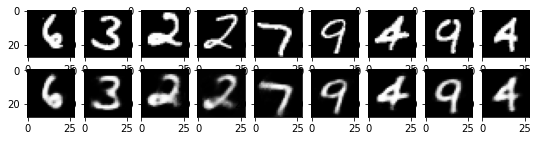

In [ ]:
for k in range(0,num_epochs):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  reconstructed = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i>=9: break
    plt.subplot(2,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(reconstructed):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])
